# Wine Cellar Depth Exploration

## Austin Castelo

### Heat equation: 

$\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2}$ with $\kappa$ the thermometric diffusivity of soil being $\kappa = 2 \times 10^{-3} \frac{cm^2}{sec}$

### Assumptions: 

The surface of the Earth has two seasons, a "summer" for half the year and a "winter" for half the year repeated every year.

The space we are working in is small enough that the curvature of the Earth can be neglected.

The diurnal variation in temperature can be neglected.

Thus, I take the first half of the year to be winter at 18˚C and the second half to be summer at 24˚C.

### Method of Approximation:

Backward Difference defined as $\frac{T^{n+1}_{j}-T^{n}_{j}}{k} = \kappa \frac{T^{n+1}_{j+1}-2T^{n+1}_{j}+T^{n+1}_{j-1}}{h^2}$

### Proof of Stability using Von Neumann Analysis

Take $T^{n}_{j}=g^ne^{imjh}$

$\frac{g^{n+1}e^{imjh}-g^ne^{imjh}}{k} = \kappa \frac{g^{n+1}e^{im(j+1)h}-2g^{n+1}e^{imjh}+g^{n+1}e^{im(j-1)h}}{h^2}$

$g^{n+1}e^{imjh}-g^ne^{imjh} = \alpha (g^{n+1}e^{im(j+1)h}-2g^{n+1}e^{imjh}+g^{n+1}e^{im(j-1)h})$ with $\alpha = \frac{\kappa k}{h^2}$

$g^{n+1}e^{imjh} = g^ne^{imjh}+ \alpha (g^{n+1}e^{im(j+1)h}-2g^{n+1}e^{imjh}+g^{n+1}e^{im(j-1)h})$ with $\alpha = \frac{\kappa k}{h^2}$

$g = 1 + g\alpha(e^{imh}+e^{-imh}-2)$

$g(1-\alpha(e^{imh}+e^{-imh}-2))=1$

$g[1+2\alpha(1-cosmh)]=1$

$g = \frac{1}{1+2\alpha(1-cosmh)} < 1$  $\forall m \in \mathbb{Z}$

$|g|<1$  $\forall \alpha \in \mathbb{R} \rightarrow$ unconditionally stable

Backward difference is unconditionally stable, thus it is stable for any choice of h,k.

### Proof of consistentcy

Taylor Expansions

$T^{n+1}_{j}= T^{n}_{j}+kT_t+\frac{1}{2}k^2T_{tt}+O(k^3)$

$T^{n+1}_{j+1}= T^{n}_{j}+kT_t+\frac{1}{2}k^2T_{tt}+O(k^3)+hT_x+\frac{1}{2}h^2T_{xx}+O(h^3)$

$T^{n+1}_{j-1}= T^{n}_{j}+kT_t+\frac{1}{2}k^2T_{tt}+O(k^3)-hT_x+\frac{1}{2}h^2T_{xx}+O(h^3)$

$\frac{T^{n+1}_{j}-T^{n}_{j}}{k}= \frac{T^{n}_{j}-T^{n}_{j}+T_{t}+\frac{1}{2}k^2T_{tt}+O(k^3)}{k}= T_t +\frac{1}{2}kT_{tt}+O(k^2)$

$ \kappa \frac{T^{n+1}_{j+1}-2T^{n+1}_{j}+T^{n+1}_{j-1}}{h^2} = \frac{\kappa}{h^2}((T^{n}_{j}+kT_t+\frac{1}{2}k^2T_{tt}+O(k^3)+hT_x+\frac{1}{2}h^2T_{xx}+O(h^3))-2(T^{n}_{j}+kT_t+\frac{1}{2}k^2T_{tt}+O(k^3))+(T^{n}_{j}+kT_t+\frac{1}{2}k^2T_{tt}+O(k^3)-hT_x+\frac{1}{2}h^2T_{xx}+O(h^3)))$

$=\frac{\kappa}{h^2}((2T^{n}_{j}+2kT_t+k^2T_{tt}+O(k^3)+h^2T_{xx}+O(h^3))-(2T^{n}_{j}+2kT_t+k^2T_{tt}+O(k^3)))$

$=\frac{\kappa}{h^2}(h^2T_{xx}+O(h^3))$

$=\kappa (T_{xx}+O(h))= \kappa T_{xx}+O(h)$

$T_t - \frac{T^{n+1}_{j}-T^{n}_{j}}{k} = \kappa T_{xx}-\kappa\frac{T^{n+1}_{j+1}-2T^{n+1}_{j}+T^{n+1}_{j-1}}{h^2}$

$T_t-(T_t+\frac{1}{2}kT_{tt}+O(k^2)) = \kappa T_{xx}-(T_{xx}+O(h))$

$0= \frac{1}{2}kT_{tt}+O(k^2)+O(h)$

The backwards difference method is consistent for our heat equation with O(k)+O(h). 

Therfore, the method is first order.

### Approximation using Backward Difference Method

I chose to approximate the "summer" and "winter" temperatures as 18 and 24 respectively by looking up the average high in winter and summer in San Diego, CA.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [346]:
def f(t):
    return np.piecewise(t, [t%365 <= 365/2, t%365 > 365/2], [18,24])
def T0(x,t):
    return t*np.e**(-.0071*x)

In [347]:
def tri_diag(a_j,b_j,c_j,d):
    m_n = np.array([a_j[0]])
    l_n = np.array([])
    
    for j in range(1, len(d)):
        l_j = c_j[j-1]/m_n[j-1]
        m_j = a_j[j] - l_j*b_j[j-1]
        l_n = np.append(l_n, l_j)
        m_n = np.append(m_n, m_j)
    y_n = np.array([d[0]])
    
    for j in range(1,len(d)):
        y_j = d[j] - l_n[j-1]*y_n[j-1]
        y_n = np.append(y_n, y_j)
    x_n = np.array([y_n[-1]/m_n[-1]])
    
    for j in range(2, len(d)):
        x_j = (y_n[-j]- b_j[-j+1]*x_n[0])/m_n[-j]
        x_n = np.insert(x_n, 0, x_j)
    x_j = (y_n[0]- b_j[0]*x_n[0])/m_n[0]
    x_n = np.insert(x_n, 0, x_j)
    return x_n


In [350]:
def back_def(M,N,kap,Tm,X):    
    t = np.linspace(0,Tm, M)
    ft = f(t)
    k = Tm/M
    h = X/N
    alpha = kap*k/(h**2)
    print(alpha)
    
    x = np.linspace(0,X, N)
    T = np.array([T0(x,ft[0])])
    T = np.repeat(T, M, axis=0)
    a = np.full(N,(1+2*alpha))
    a[0]= a[-1] = 1
    b = np.full(N-1, -1*alpha)
    c = np.full(N-1, -1*alpha)
    b[0] = c[-1] = 0
    
    for i in range(1,M):
        T[i-1][0] = ft[i-1]
        T[i] = tri_diag(a,b,c,T[i-1])
    return T

In [651]:
def graph(M,N,kap,Tm,X):
    T = back_def(M,N,kap,Tm,X)
    x = np.linspace(0,X, N)
    
    plt.figure(figsize=(13,8) , facecolor= 'w')
    Tsamp = np.arange(91,Tm,180)
    color=iter(cm.Dark2(np.linspace(1,0,len(Tsamp))))
    plt.plot(x, T[0], color = 'b', linewidth = 2)
    for i in Tsamp[:10]:
        c = next(color)
        plt.plot(x, T[i], color = c, linewidth = 2)
    plt.grid(linewidth = 2)
    plt.legend(labels = np.insert(Tsamp[:10],0,0), title = 'Days')
    plt.title('Temperature Disipation Through Soil Depth')
    plt.xlabel('Soil depth(cm)')
    plt.ylabel('Temperature(˚C)')
    plt.show()
    
    plt.figure(figsize=(13,8) , facecolor= 'w')
    for i in Tsamp[10:]:
        c = next(color)
        plt.plot(x, T[i], color = c, linewidth = 2)
    plt.grid(linewidth = 2)
    plt.legend(labels = Tsamp[10:], title = 'Days')
    plt.title('Temperature Disipation Through Soil Depth')
    plt.xlabel('Soil depth(cm)')
    plt.ylabel('Temperature(˚C)')
    plt.show()
    return T

In [678]:
kap = 2*10**(-3)*3.15*10**7/365.25
kap

172.48459958932239

172.48459958932239


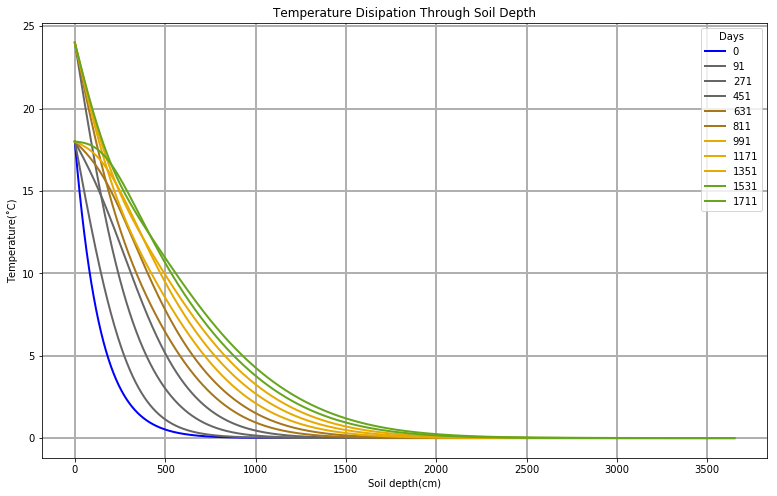

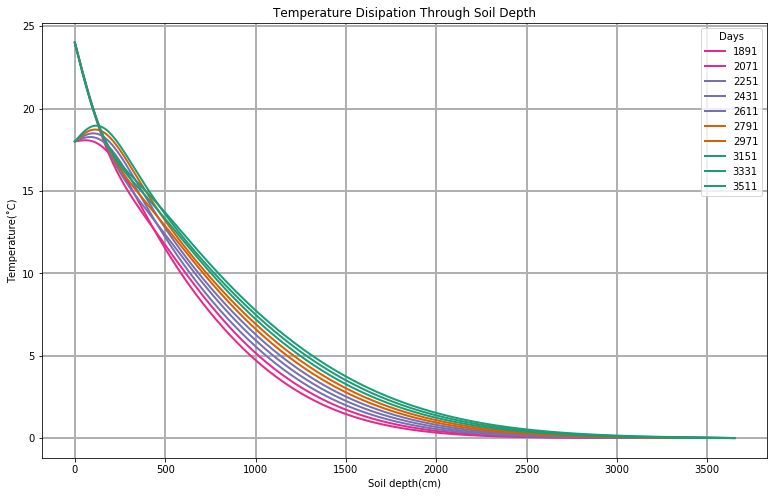

In [679]:
totalTime = 365*10
totalx = 3650
T = graph(totalTime,totalx,kap,totalTime,3650)

As we would expect as the days increase the variation at a depth x > 100 cm from season to season decreases. For the first 100 cm the variation still decreases, but due to proximity to the surface and the variation between summer and winter they remain significantly more volatile.

### Ideal Wine Cellar Depth based on Phase

#### Goal:
Our goal is to find a wine cellar depth, $x_c$, at which the phase is the opposite of the surface i.e. the temperature reaches its peak during the surfaces winter and minimium during summer.

This value $x_c$ changes based on the time the system is initialized for, thus I will give a range of $x_c$ values based on a range of initialization from 5 years to 9 years.

As can been seen in the graph below the variation between seasons decreases as we increase depth, however we also see that as depth increases the minimium and maximium temperature in a 1 year period is shifted to the right.

Thus, to find the $x_c$ values we use our approximation of $\frac{\partial T}{\partial t}$ to find the depth at which the maximium is reached in the middle of winter and the minimium is reached in the middle of summer. 

Therefore we are looking for $\frac{\partial T(a+91,x)}{\partial t}=0$ with $a= 365*y$ where y is the years of initialization which means we are looking for x such that our approximation $\kappa \frac{T^{a+91+1}_{j+1}-2T^{a+91+1}_{j}+T^{a+91+1}_{j-1}}{h^2} \approx 0$.

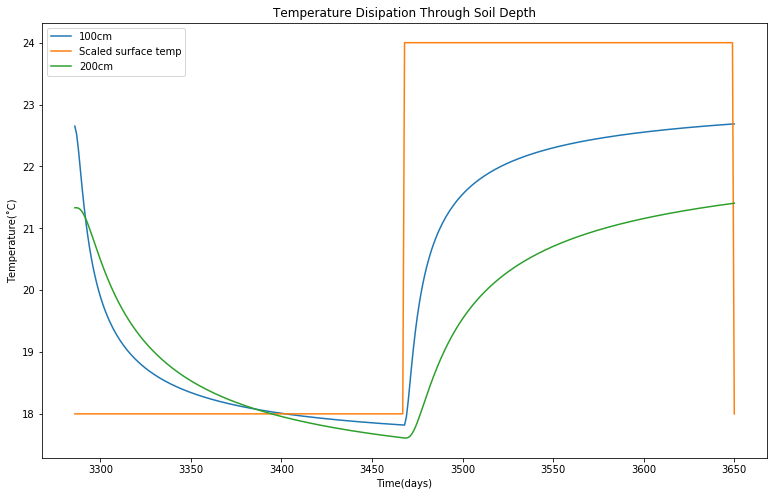

In [680]:
plt.figure(figsize=(13,8) , facecolor= 'w')
a =365*9
b= 50
y = T[a:,b]
t = np.linspace(0,a+365,a+365)
plt.plot(t[a:],y)
plt.plot(t[a:],f(t[a:]))
plt.plot(t[a:],T[a:,100])
plt.legend(labels = ['100cm', 'Scaled surface temp', '200cm'])
plt.title('Temperature Disipation Through Soil Depth')
plt.xlabel('Time(days)')
plt.ylabel('Temperature(˚C)')
plt.show()

In [698]:
h = 1
for i in range(5,10):
    y = 365*i
    j = 100
    while(abs(kap/(h**2)*(T[y+(91),j+1]-2*T[y+(91),j]+T[y+(91),j-1])) > 0.0001):
        j +=1
    print('With ' + str(i) + ' years of initialization:')
    print('The depth at which the temperature is out of phase with the surface is '+str(j) + 'cm')
    print("The variation between seasons at this depth is "+str(abs(kap/h*(T[i+(91+183),j+1]-2*T[i+(91+183),j]+T[i+(91+183),j-1])))
         +'˚C')

With 5 years of initialization:
The depth at which the temperature is out of phase with the surface is 393cm
The variation between seasons at this depth is 0.016644730126473606˚C
With 6 years of initialization:
The depth at which the temperature is out of phase with the surface is 402cm
The variation between seasons at this depth is 0.0161643127832441˚C
With 7 years of initialization:
The depth at which the temperature is out of phase with the surface is 409cm
The variation between seasons at this depth is 0.015804435180284626˚C
With 8 years of initialization:
The depth at which the temperature is out of phase with the surface is 414cm
The variation between seasons at this depth is 0.015558316989706718˚C
With 9 years of initialization:
The depth at which the temperature is out of phase with the surface is 418cm
The variation between seasons at this depth is 0.015368538357625737˚C


As we can see the variation between seasons for all of the $x_c$ found is $\approx 0.016$ with the longer initialization time leading to slightly smaller variation which is to be expected.

The range of $x_c$ values increase as the system is given more initialization time to propagate heat into the soil, thus we have a range of $x_c \in [393cm,418cm]$ for initialization periods from 5 to 9 years.

Thus, while there is not a stable depth at which the temperature maintains an inverse of the phase at the surface level the goal for a wine cellar is to minimize temperature variations, thus I would choose $x_c=4.18m$ for the depth of my wine cellar.

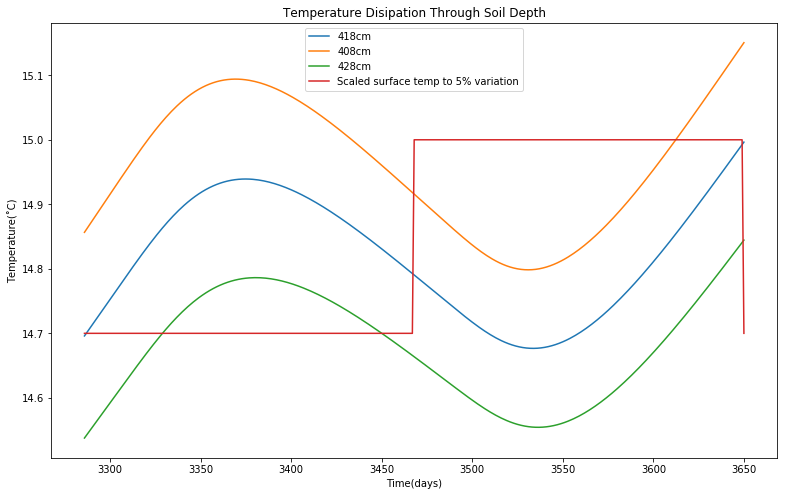

In [696]:
plt.figure(figsize=(13,8) , facecolor= 'w')
a =365*9
b= 418
y1 = T[a:,b]
y2 = T[a:,b-10]
y3 = T[a:,b+10]
t = np.linspace(0,a+365,a+365)
plt.plot(t[a:],y1)
plt.plot(t[a:],y2)
plt.plot(t[a:],y3)
plt.plot(t[a:],f(t[a:])*.05+13.8)
plt.legend(labels = ['418cm','408cm','428cm', 'Scaled surface temp to 5% variation'])
plt.title('Temperature Disipation Through Soil Depth')
plt.xlabel('Time(days)')
plt.ylabel('Temperature(˚C)')
plt.show()

As we can see over the one year period from year 9 to year 10 the depth of 4.18m is consistent with what we were looking for where its phase is the inverse of the surface phase.